In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

DIR = "/content/drive/MyDrive/Competitions/Signate/OCEAN180"
INPUT_DIR = os.path.join(DIR,"input")
OUTPUT_DIR = os.path.join(DIR,"output")

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
train = pd.read_csv(os.path.join(INPUT_DIR,"train_data.csv"))
test = pd.read_csv(os.path.join(INPUT_DIR,"test_data.csv"))
sample_sub = pd.read_csv(os.path.join(INPUT_DIR,"submit_example.csv"), header=None)

print(train.shape)
display(train.head(3))

print(test.shape)
display(test.head(3))

print(sample_sub.shape)
display(sample_sub.head(3))

(14140, 3465)


,Unnamed: 0,lat,lon,area,YMD,year,month,cover,depth_original,cliff_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.989139,125.243167,20.0,20110926,2011.0,9.0,0.050,NaN,0.0,...,0.507961,0.287288,-0.278071,-0.808075,-2.341663,2.353039,95.142525,3.728732,-2.405135,3725_10
1,1,26.996172,127.912024,40.0,2009.7.6-2009.7.28,2009.0,7.0,0.725,NaN,0.0,...,0.353645,0.245048,-0.100556,-0.771423,-3.282602,4.672225,174.767501,-0.571513,0.448861,4027_13
2,2,26.363556,127.735139,20.0,20091014,2009.0,10.0,0.025,NaN,0.0,...,0.579204,0.281260,-0.191884,-0.853730,-3.160207,3.324236,62.711236,3.284478,-57.136191,3927_22


(4039, 3464)


,Unnamed: 0,lat,lon,area,YMD,year,month,depth_original,cliff_length,aicial_length,...,MIN_NormG_2020,MIN_NormR_2020,MIN_PPR_2020,MIN_PSNDc2_2020,MIN_RDVI_2020,MIN_IF_2020,MIN_SLAVI_2020,MIN_SIPI2_2020,MIN_VARIgreen_2020,mesh20
0,0,24.352222,124.202674,20.0,2002.12,2002.0,12.0,0.5,0.000000,725.621704,...,0.409346,0.323023,-0.066356,-0.560810,-3.203797,4.297234,926.905329,1.669992,0.194766,3624_20
1,1,24.420028,124.078583,20.0,20100723,2010.0,7.0,NaN,0.000000,0.000000,...,0.540733,0.275585,-0.291240,-0.824888,-2.222276,2.263106,57.661693,4.274851,-79.273275,3624_20
2,2,26.494197,127.836013,100.0,"2004.2.20-2004.2.22,2004.2.27-2004.2.29,2004.3...",2004.0,2.0,13.8,73.183418,80.595177,...,0.601792,0.252251,-0.318454,-0.861477,-2.060505,2.099250,42.672829,5.655713,-2.061417,3927_23


(4039, 2)


,0,1
0,0,0.47
1,1,0.68
2,2,0.25


In [5]:
train.rename(columns={"Unnamed: 0":"id"}, inplace=True)
test.rename(columns={"Unnamed: 0":"id"}, inplace=True)

In [6]:
def missing_func(df):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
  df_missing = pd.concat([total,percent],axis=1,keys=['total','percent'])
  return df_missing 

In [7]:
train_missing = missing_func(train)
test_missing = missing_func(test)

In [8]:
train_cols = train.columns.tolist()
test_cols = test.columns.tolist()

target = set(train_cols) - set(test_cols)
print(target)

display(train[target].head(3))

{'cover'}


,cover
0,0.050
1,0.725
2,0.025


In [9]:
train["adv_flag"] = 0
test["adv_flag"] = 1

df = pd.concat([train,test]).reset_index(drop=True)

In [10]:
train_missing_50 = train_missing[train_missing.percent<0.5].index
test_missing_50 =  test_missing[test_missing.percent<0.5].index

categorical_features = train.dtypes[train.dtypes=="object"].index

features = set(train_missing_50) & set(test_missing_50)
features = set(features) - set(categorical_features) 

In [11]:
display(df[features])

,MAX_SWIR2_2019,MED_RDVI_2019,CI,MIN_IR550_2015,MAX_RDVI_2004,MED_BWDRVI_2006,MED_GEMI_2016,MIN_Chlgreen_2000,MAX_Alteration_2003,MED_PSNDc2_2006,...,MAX_IF_2007,MED_Chlgreen_2005,MAX_GEMI_2012,MIN_D678_500_2015,MAX_CRI550_2000,MAX_Chlred_edge_2004,MAX_Fe3_2005,MED_MCARI1_2004,MIN_TIRS1_2015,MIN_GEMI_2001
0,7.098475,-2.049904,-2.621574,0.034338,-1.962049,-0.887619,-161.461590,2.547509,5.049116,-0.342716,...,2.432908,4.071628,-65.107007,-38.411983,-0.006776,1.762765,0.614153,8.062696,9.020161,-55.584460
1,1.348397,1.753888,-0.506367,0.013896,NaN,-0.898490,-425.172036,NaN,NaN,-0.303199,...,5.476036,5.936833,NaN,-47.140961,NaN,NaN,0.553688,NaN,8.297815,-85.194261
2,0.509095,-2.724328,-1.764840,0.016101,-1.445508,-0.940061,-212.685233,9.965029,4.046735,-0.528026,...,3.743175,2.835421,-503.029508,-40.993088,-0.009247,1.422458,0.832155,7.810036,8.748871,-214.827747
3,0.269905,-2.317531,NaN,0.021670,NaN,NaN,-94.922268,NaN,NaN,NaN,...,NaN,NaN,NaN,-60.422593,NaN,NaN,NaN,NaN,8.729184,-54.079196
4,0.211498,-2.009363,-4.863440,0.017219,NaN,-0.972951,-128.305198,NaN,NaN,-0.758864,...,NaN,NaN,NaN,-66.609690,NaN,NaN,NaN,NaN,8.503771,-32.936260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18174,1.453212,-2.557626,-2.098702,0.012074,NaN,-0.971826,-188.879743,NaN,3.779248,-0.749957,...,4.481278,3.413437,-77.583136,-50.545830,NaN,NaN,0.790178,NaN,8.045586,-143.061203
18175,0.454260,-2.044520,-2.680532,0.029564,-1.715096,-0.968777,-175.041190,2.858954,5.786946,-0.726233,...,2.453485,3.904989,NaN,-44.329583,-0.010038,2.831595,0.528031,13.152754,9.007642,-93.235546
18176,0.996076,-1.928491,NaN,0.013352,-3.240194,-0.905663,-640.600893,NaN,3.420176,-0.338438,...,13.475486,4.008445,-270.519788,-38.129995,NaN,3.656578,0.700593,5.853343,8.972373,-599.759841
18177,7.362761,-1.914140,-1.104393,0.009072,-1.420959,-0.968199,-239.571034,2.766561,NaN,-0.721799,...,2.447987,2.913500,-63.406836,-50.079730,-0.007183,2.029015,0.818117,16.753552,5.729261,-172.633630


In [12]:
tr_mesh = train.mesh20.value_counts().index
te_mesh = test.mesh20.value_counts().index

test_only_mesh = list(set(te_mesh)-set(tr_mesh))
test_mesh = list(set(te_mesh)-set(test_only_mesh))

## Model

In [13]:
!pip install iterative-stratification

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold, GroupKFold, StratifiedGroupKFold, KFold
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score

In [15]:
class CFG:
  model="lightgbm"
  n_folds=4
  trn_fold=[0, 1, 2, 3]
  seed=42
  target_cols="adv_flag"
  boosting_type="gbdt"
  fold_target="adv_flag"

In [16]:
# =========================================================================================
# CV split
# =========================================================================================
def get_fold(df,fold_target, isFlag=False):
  if isFlag:
    Fold = StratifiedKFold(n_splits=CFG.n_folds, shuffle=True, random_state=CFG.seed)
    for n, (train_index, val_index) in enumerate(Fold.split(df, df[fold_target])):
        df.loc[val_index, 'fold'] = int(n)
  else:
    Fold = KFold(n_splits=CFG.n_folds, shuffle=True, random_state=CFG.seed)
    for n, (train_index, val_index) in enumerate(Fold.split(df)):
      df.loc[val_index, 'fold'] = int(n)
  df['fold'] = df['fold'].astype(int)
  display(df.groupby('fold').size())
  return df

In [17]:
def get_score(labels, preds, isFlag=False):
  if isFlag:
    f1score = f1_score(labels, preds)
    pscore = precision_score(labels, preds)
    rscore =recall_score(labels, preds)
    print(f"F1 Score : {f1score}")
    print(f"Precision Score : {pscore}")
    print(f"Recall Score {rscore}")
  else:
    rmse = np.sqrt(mean_squared_error(labels, preds))
    print(f"RMSE {rmse}")

In [18]:
features = list(features)
features.remove('id')

In [19]:
params1 = {
        'objective': "binary",
        'metric': 'binary_logloss',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.5,
        "n_estimators":1000
    }

params2 = {
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.1,
        'boosting': CFG.boosting_type,
        'seed': CFG.seed,
        "reg_alpha":0.5,
        "n_estimators":1000
    }

In [20]:
def get_pred(df, fold_target, target_cols, model, isFlag=False):
  if isFlag:
    pred_name = "flag"
    train = get_fold(df, fold_target, isFlag=True)
  else:
    pred_name = ""
    train = get_fold(df, fold_target, isFlag=False)
  oof_df = pd.DataFrame()
  df_importance = pd.DataFrame({'feature': features})
  df_importance['importance'] = 0

  for fold in range(CFG.n_folds):
    if fold in CFG.trn_fold:
      print("="*15,f" FOLD : {fold} ","="*15)
      train_folds = train[train['fold'] != fold]
      valid_folds = train[train['fold'] == fold]

      train_X = train_folds[features].values
      valid_X = valid_folds[features].values
      train_labels = train_folds[target_cols].values
      valid_labels = valid_folds[target_cols].values

      clf = model
      #model = lgb.LGBMRegressor(**params)
      clf.fit(train_X, train_labels,
              eval_set=[(valid_X, valid_labels)],
              #eval_metric="rmse",
              verbose = 200,
              early_stopping_rounds=50)
      
      valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)
      oof_df = pd.concat([oof_df, valid_folds])

      f_importance = np.array(model.feature_importances_)
      temp_importance = pd.DataFrame({'feature': features, 'importance': f_importance})
      df_importance['importance'] += temp_importance['importance']

      get_score(valid_labels, valid_folds[f"{pred_name}_pred"], isFlag)

  df_importance['importance'] = df_importance['importance'] / np.sum(df_importance['importance'])
  df_importance = df_importance.sort_values('importance', ascending=False)
  display(df_importance.head(35))
  fig = plt.figure(figsize=(16, 32), tight_layout=True)
  sns.barplot(x="importance", y="feature", data=df_importance.head(35))
  plt.title("LightGBM feature importances")
  get_score(oof_df[target_cols], oof_df[f"{pred_name}_pred"], isFlag)
  return oof_df

fold
0    4545
1    4545
2    4545
3    4544
dtype: int64

===============  FOLD : 0  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's binary_logloss: 0.0124151
Early stopping, best iteration is:
[169]	valid_0's binary_logloss: 0.0123916


<ipython-input-20-89b4f046af98>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


F1 Score : 0.9855936413313463
Precision Score : 0.9890329012961117
Recall Score 0.9821782178217822
===============  FOLD : 1  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's binary_logloss: 0.0103054
Early stopping, best iteration is:
[176]	valid_0's binary_logloss: 0.0102942


<ipython-input-20-89b4f046af98>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


F1 Score : 0.9920792079207921
Precision Score : 0.9920792079207921
Recall Score 0.9920792079207921
===============  FOLD : 2  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's binary_logloss: 0.00956636
Early stopping, best iteration is:
[167]	valid_0's binary_logloss: 0.00952635


<ipython-input-20-89b4f046af98>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


F1 Score : 0.9945463559742191
Precision Score : 0.9960278053624627
Recall Score 0.9930693069306931
===============  FOLD : 3  ===============
Training until validation scores don't improve for 50 rounds.
[200]	valid_0's binary_logloss: 0.0157132
Early stopping, best iteration is:
[162]	valid_0's binary_logloss: 0.0156689


<ipython-input-20-89b4f046af98>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_folds[f"{pred_name}_pred"] = model.predict(valid_X)


F1 Score : 0.9875187219171244
Precision Score : 0.9949698189134809
Recall Score 0.9801783944499505


,feature,importance
852,sst_diff,0.029476
921,Salinity_annual,0.029228
2214,sst_ymd,0.028388
641,river_area,0.027794
2665,year,0.026756
369,lat,0.024431
2978,hist_warm_sst,0.023986
2690,river_dist,0.020475
173,month,0.019535
1085,lon,0.019189


F1 Score : 0.9899416366571464
Precision Score : 0.9930244145490782
Recall Score 0.9868779400841793


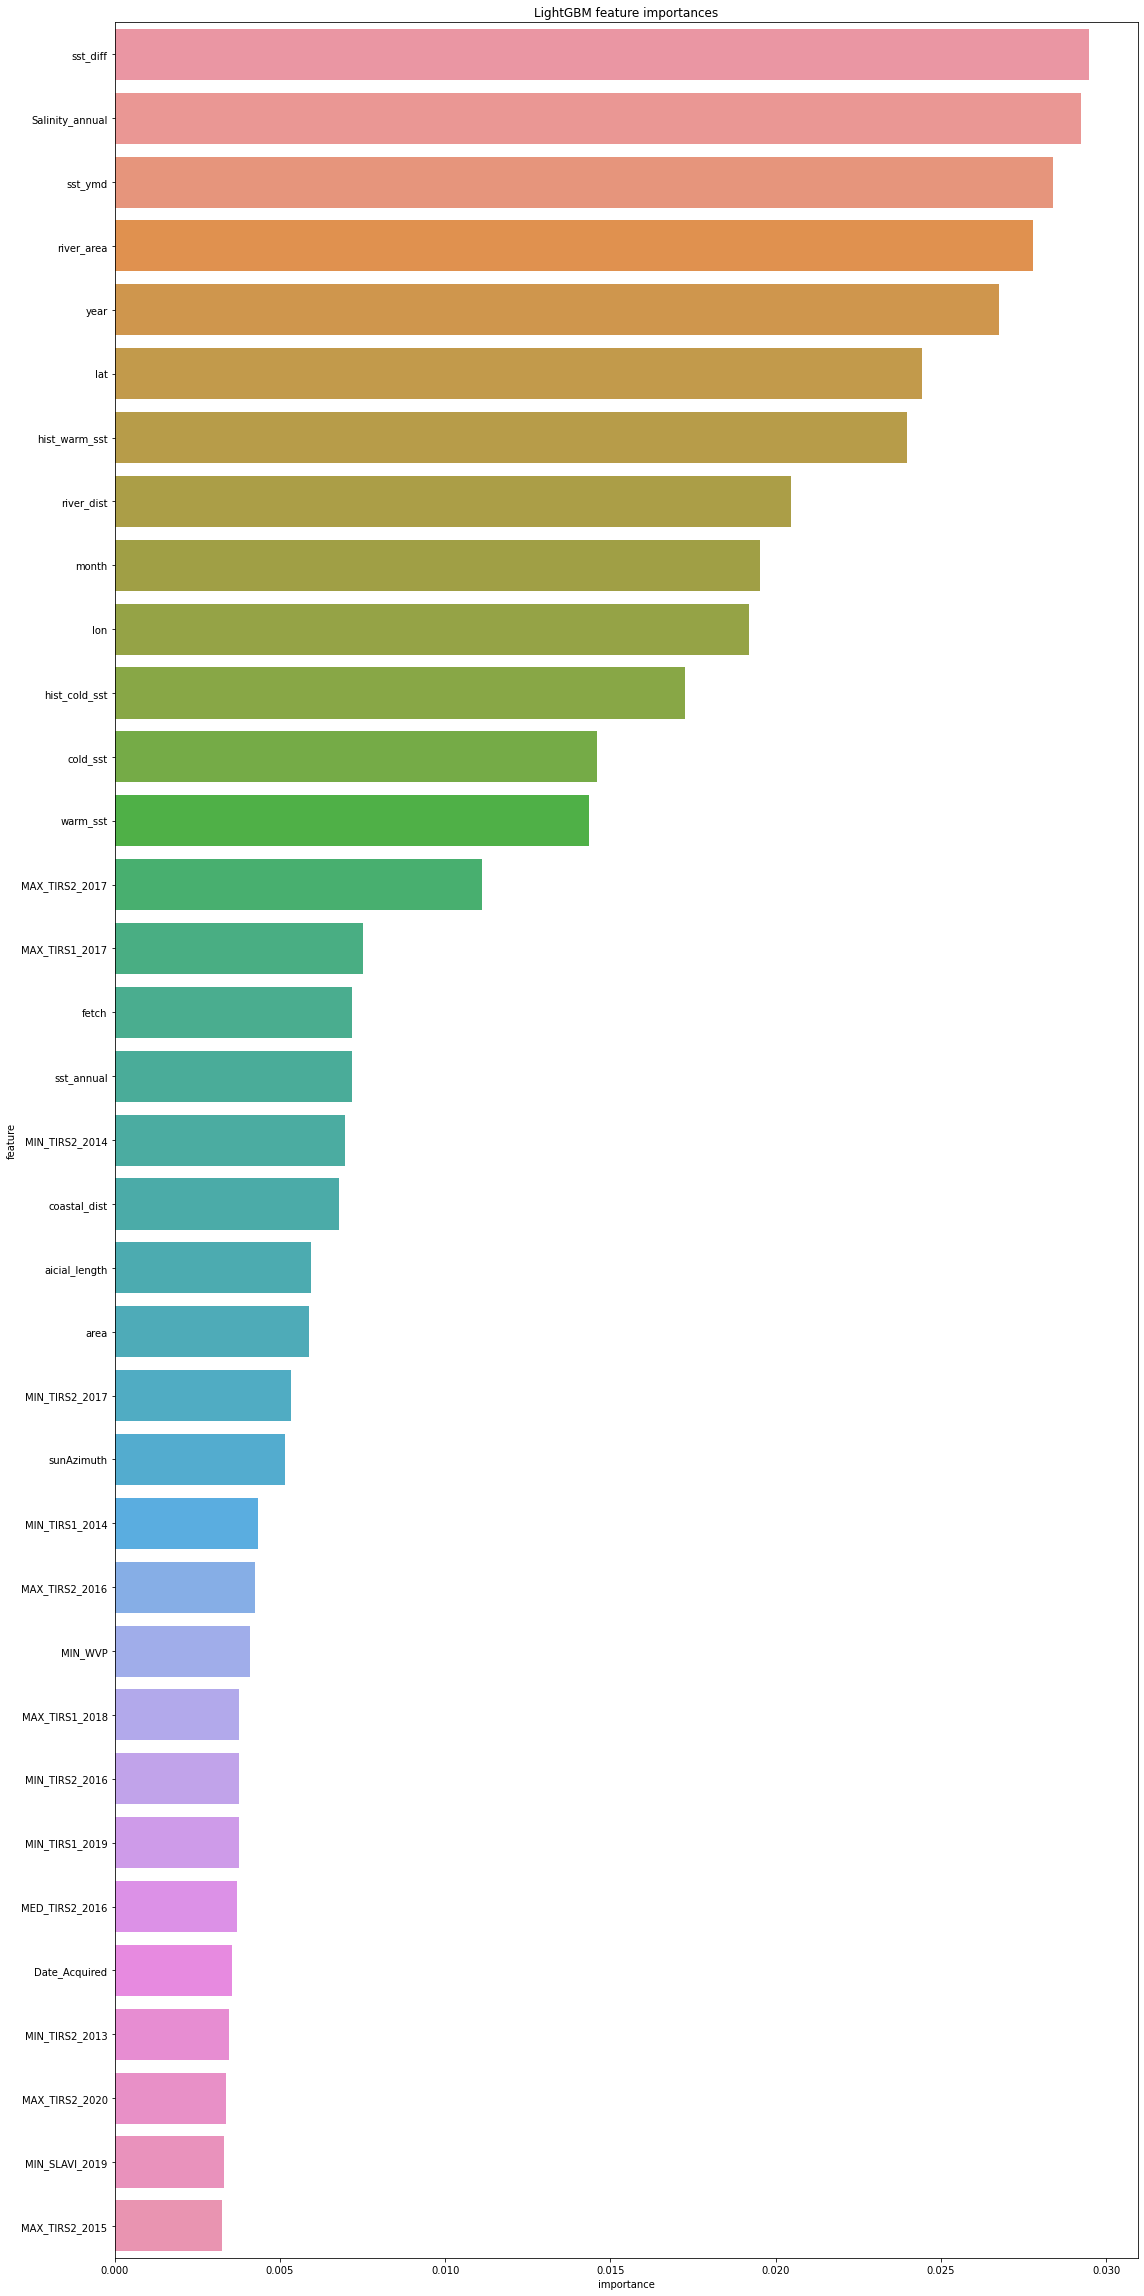

In [21]:
model1 = lgb.LGBMClassifier(**params1)
flag_oof = get_pred(df, CFG.fold_target, CFG.target_cols, model1, isFlag=True)

In [23]:
#flag_oof["flag_state"] = (flag_oof["flag_pred"]>.8).astype(int)
flag_oof.flag_pred.value_counts()

0    14165
1     4014
Name: flag_pred, dtype: int64

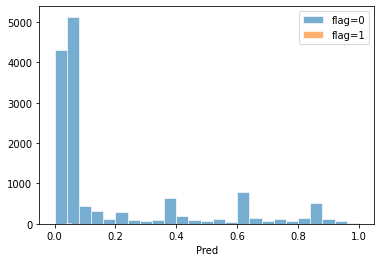

In [25]:
flag_oof_train = flag_oof.loc[flag_oof.adv_flag==0]
plt.hist(flag_oof_train.loc[flag_oof_train.flag_pred==0]["cover"], label='flag=0', bins=25, edgecolor='white', alpha=.6)
plt.hist(flag_oof_train.loc[flag_oof_train.flag_pred==1]["cover"], label='flag=1', bins=25, edgecolor='white', alpha=.6)
plt.xlabel("Pred")
plt.legend()
plt.show()

In [26]:
flag_oof_train.flag_pred.value_counts()

0    14112
1       28
Name: flag_pred, dtype: int64